## sprint-4-T04
### Source: sprint-3-T05 (WITH GRAPHICS)
### Eloi Canals

[x] Nivell 1. Exercici 1. Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

delfli = pd.read_csv('DelayedFlights.csv', index_col=0)

to_keep = ['Year','Month','DayofMonth','DayOfWeek','DepTime','ArrTime','UniqueCarrier','FlightNum','TailNum','ActualElapsedTime','AirTime','ArrDelay','DepDelay','Origin','Dest','Distance','Cancelled','Diverted','CarrierDelay','WeatherDelay']
mycols=delfli[to_keep]
mycols[:10]

/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay
0,2008,1,3,4,2003.0,2211.0,WN,335,N712SW,128.0,116.0,-14.0,8.0,IAD,TPA,810,0,0,NaN,NaN
1,2008,1,3,4,754.0,1002.0,WN,3231,N772SW,128.0,113.0,2.0,19.0,IAD,TPA,810,0,0,NaN,NaN
2,2008,1,3,4,628.0,804.0,WN,448,N428WN,96.0,76.0,14.0,8.0,IND,BWI,515,0,0,NaN,NaN
4,2008,1,3,4,1829.0,1959.0,WN,3920,N464WN,90.0,77.0,34.0,34.0,IND,BWI,515,0,0,2.0,0.0
5,2008,1,3,4,1940.0,2121.0,WN,378,N726SW,101.0,87.0,11.0,25.0,IND,JAX,688,0,0,NaN,NaN
6,2008,1,3,4,1937.0,2037.0,WN,509,N763SW,240.0,230.0,57.0,67.0,IND,LAS,1591,0,0,10.0,0.0
10,2008,1,3,4,706.0,916.0,WN,100,N690SW,130.0,106.0,1.0,6.0,IND,MCO,828,0,0,NaN,NaN
11,2008,1,3,4,1644.0,1845.0,WN,1333,N334SW,121.0,107.0,80.0,94.0,IND,MCO,828,0,0,8.0,0.0
15,2008,1,3,4,1029.0,1021.0,WN,2272,N263WN,52.0,37.0,11.0,9.0,IND,MDW,162,0,0,NaN,NaN
16,2008,1,3,4,1452.0,1640.0,WN,675,N286WN,228.0,213.0,15.0,27.0,IND,PHX,1489,0,0,3.0,0.0


[x] Nivell 1. Exercici 2. Informe Complet

### Resum estadistic per columnes

In [2]:
mycols.Month.value_counts()

12    203385
6     200914
3     200842
2     189534
1     183527
7     182945
8     162648
4     155264
5     153072
11    105563
10    103525
9      95539
Name: Month, dtype: int64

#### Nombre de retrasos acumulats per mes (Mostrant noms dels mesos)

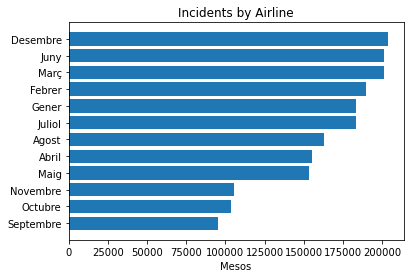

In [3]:
Totals_x_month = mycols.Month.value_counts()


#Totals_x_month.index = ['Gener', 'Febrer', 'Març', 'Abril', 'Maig', 'Juny', 'Juliol', 'Agost', 'Septembre', 'Octubre', 'Novembre', 'Desembre']
Totals_x_month.index = Totals_x_month.index.map({1:'Gener', 2:'Febrer', 3:'Març', 4:'Abril', 5:'Maig', 6:'Juny', 7:'Juliol', 8:'Agost', 9:'Septembre', 10:'Octubre', 11:'Novembre', 12:'Desembre'})
Totals_x_month


fig, ax = plt.subplots()

# data
x_pos = Totals_x_month.index
y_pos = np.arange(Totals_x_month.count())

ax.barh(y_pos, Totals_x_month, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(x_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Mesos')
ax.set_title('Incidents by Airline')

plt.show()

#### Nombre de retrasos per Carrier (Mostrant el nom de la Aerolinia)

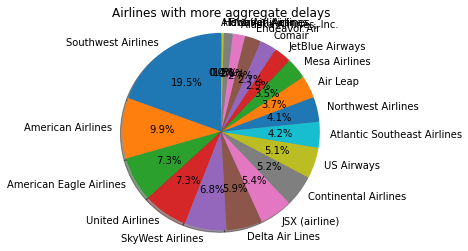

In [4]:
Totals_x_carrier = mycols.UniqueCarrier.value_counts()

carriers = pd.read_csv('AirlineCodesIATA.csv', index_col=0)

to_keep_c = ['Airline']
carriers_ok=carriers[to_keep_c]

# Borrar index duplicats
carriers_ok = carriers_ok[~carriers_ok.index.duplicated()]
newidx = carriers_ok.reindex()

myDic = carriers_ok.to_dict()


Totals_x_carrier.index = Totals_x_carrier.index.map(myDic['Airline'])

Totals_x_carrier


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = Totals_x_carrier.index
myDelays = Totals_x_carrier

fig1, ax1 = plt.subplots()
ax1.pie(myDelays, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title('Airlines with more aggregate delays')

plt.show()

### Columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)

In [5]:
avg_speed = mycols['Distance'] / ( mycols['AirTime'] / 60 )
#avg_speed.round(2)

mycols['AvgSpeed'] = avg_speed
mycols[:10]['AvgSpeed']


<ipython-input-5-5dc6a680279a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mycols['AvgSpeed'] = avg_speed


0     418.965517
1     430.088496
2     406.578947
4     401.298701
5     474.482759
6     415.043478
10    468.679245
11    464.299065
15    262.702703
16    419.436620
Name: AvgSpeed, dtype: float64

#### Columna nova: Vol amb retràs

In [ ]:
print (mycols['ArrDelay'].values)

def check_late(row):
    if row['ArrDelay'] > 0:
        return True
    else:
        return False


mycols['FlightLate'] = mycols.apply(check_late, axis=1)


mycols

delayedFlights = mycols.FlightLate.value_counts()
delayedFlights

[-14.   2.  14. ...  99.   9.  -5.]


### Taula de les aerolínies amb més endarreriments acumulats

In [ ]:
delayed_flights = mycols.loc[mycols['FlightLate'] == True ]

Delays_x_carrier = delayed_flights.UniqueCarrier.value_counts()


Delays_x_carrier.index = Delays_x_carrier.index.map(myDic['Airline'])

Delays_x_carrier

x = Delays_x_carrier.index
y = Delays_x_carrier

plt.stem(x, y)
plt.show()

### Vols més llargs? I els més endarrerits?

In [ ]:
# Vols més llargs (TEMPS)

longest_flights = mycols.sort_values(by='AirTime',ascending=False)

longest_flights[:10]['AirTime']

In [ ]:
# Vols més llargs (DISTANCIA)

largest_flights = mycols.sort_values(by='Distance',ascending=False)


selection_longest = largest_flights.loc[:10,['FlightNum', 'Origin', 'Dest', 'Distance']]
selection_longest

#### Vols més endarrerits

In [ ]:
# Vols més endarrerits. Diferencia entre sortida prevista i sortida real

longest_delays = mycols.sort_values(by='DepDelay',ascending=False)

longest_delays[:10]




### Extra Ball

#### Total incidencies per dia de la setmana (mostrant el nom del dia)

In [ ]:
# Totals per dia de la setmana

Totals_x_day = mycols.DayOfWeek.value_counts()

Totals_x_day.index = Totals_x_day.index.map({1:'Dilluns', 2:'Dimarts', 3:'Dimecres', 4:'Dijous', 5:'Divendres', 6:'Dissabte', 7:'Diumenge'})
Totals_x_day


x = Totals_x_day.index
y = Totals_x_day

plt.step(x, y + 2, label='pre (default)')
plt.plot(x, y + 2, 'o--', color='grey', alpha=0.3)

plt.step(x, y + 1, where='mid', label='mid')
plt.plot(x, y + 1, 'o--', color='grey', alpha=0.3)

plt.step(x, y, where='post', label='post')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)

plt.grid(axis='x', color='0.95')
plt.legend(title='Parameter where:')
plt.title('plt.step(where=...)')
plt.show()